# Student Activity: Beta Comparisons

Upper management at Harold's company is thinking about investing in a social media stock. They want to be somewhat conservative and look at social media stocks with the lowest beta relative to the others. Harold has been asked to calculate and plot the 30-day rolling betas for these social media stocks: Facebook (FB), Twitter (TWTR), and Snapchat (SNAP).

Use the Pandas library to help Harold calculate and plot the 30-day rolling betas for social media stocks, and then determine the social media stock with the lowest beta value.

## Instructions

### Import Libraries and Dependencies

In [11]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

### Read CSVs in as DataFrames

In [12]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\06-Stu_Beta\Resources\fb_data.csv'
fb_df = pd.read_csv(fb, index_col='date', infer_datetime_format=True, parse_dates=True)
#fb_df.head()

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\06-Stu_Beta\Resources\snap_data.csv'
snap_df = pd.read_csv(snap, index_col='date', infer_datetime_format=True, parse_dates=True)
#snap_df.head()

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500 = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\06-Stu_Beta\Resources\sp500_data.csv'
sp500_df = pd.read_csv(sp500, index_col='date', infer_datetime_format=True, parse_dates=True)
#sp500_df.head()

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr = r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\06-Stu_Beta\Resources\twtr_data.csv'
twtr_df = pd.read_csv(twtr, index_col='date', infer_datetime_format=True, parse_dates=True)
twtr_df.head()

,close
date,
2019-05-17,37.50
2019-05-16,38.30
2019-05-15,37.90
2019-05-14,36.93
2019-05-13,36.59


### Combine DataFrames, Sort Index, and Rename Columns

In [15]:
# Create a new DataFrame where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, snap_df, twtr_df, sp500_df], axis='columns', join='inner')
combined_df.columns = ['FB', 'SNAP', 'TWTR', 'SP500']

combined_sort_df = combined_df.sort_values('date', ascending=True)
combined_sort_df

,FB,SNAP,TWTR,SP500
date,,,,
2017-03-02,136.76,24.48,15.79,2381.919922
2017-03-03,137.17,27.09,15.75,2383.120117
2017-03-06,137.42,23.77,15.56,2375.310059
2017-03-07,137.30,21.44,15.18,2368.389893
2017-03-08,137.72,22.81,15.24,2362.979980
...,...,...,...,...
2019-05-13,181.54,10.11,36.59,2811.870117
2019-05-14,180.73,10.49,36.93,2834.409912
2019-05-15,186.27,10.66,37.90,2850.959961


### Calculate Daily Returns

In [16]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_sort_df.pct_change()
daily_returns

,FB,SNAP,TWTR,SP500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,0.106618,-0.002533,0.000504
2017-03-06,0.001823,-0.122554,-0.012063,-0.003277
2017-03-07,-0.000873,-0.098023,-0.024422,-0.002913
2017-03-08,0.003059,0.063899,0.003953,-0.002284
...,...,...,...,...
2019-05-13,-0.036105,-0.036225,-0.048375,-0.024131
2019-05-14,-0.004462,0.037587,0.009292,0.008016
2019-05-15,0.030653,0.016206,0.026266,0.005839


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [45]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
cov_FB = daily_returns['FB'].cov(daily_returns['SP500'])

cov_SNAP = daily_returns['SNAP'].cov(daily_returns['SP500'])

cov_TWTR = daily_returns['TWTR'].cov(daily_returns['SP500'])

print(f"The covariance of FB is {cov_FB}")
print(f"The covariance of SNAP is {cov_SNAP}")
print(f"The covariance of TWTR is {cov_TWTR}")

The covariance of FB is 8.971694582778608e-05
The covariance of SNAP is 7.769087430496202e-05
The covariance of TWTR is 0.00010569463221453388


### Calculate Variance of S&P 500 Returns

In [21]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
var_FD = daily_returns['FB'].var()
var_SNAP = daily_returns['SNAP'].var()
var_TWTR = daily_returns['TWTR'].var()

# Diplay S&P 500 variance
var_SP500 = daily_returns['SP500'].var()
var_SP500

7.00079617330316e-05

### Calculate Beta Values of Social Media Stocks

In [24]:
# Calculate beta of all daily returns of social media stocks
Beta_FB = cov_FB / var_SP500
Beta_SNAP = cov_SNAP / var_SP500
Beta_TWTR = cov_TWTR / var_SP500

# Display the beta value of each social media stock
print(f"The beta value of FB is {Beta_FB}")
print(f"The beta value of SNAP is {Beta_SNAP}")
print(f"The beta value of TWTR is {Beta_TWTR}")

The beta value of FB is 1.2815248952670946
The beta value of SNAP is 1.1097434117740557
The beta value of TWTR is 1.5097515996479065


### Calculate 30-Day Rolling Betas of Social Media Stock Returns vs. S&P 500 Returns

In [34]:
# Calculate 30-day rolling covariance of social media stocks vs. S&P 500 and plot the data
Roll_cov_FB = daily_returns['FB'].rolling(window=30).cov(daily_returns['SP500'])
Roll_cov_SNAP = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['SP500'])
Roll_cov_TWTR = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['SP500'])

# Calculate 30-day rolling variance of S&P 500
Roll_var_SP500 = daily_returns['SP500'].rolling(window=30).var()

# Calculate 30-day rolling beta of social media stocks and plot the data
Roll_beta_FB = Roll_cov_FB / Roll_var_SP500 
Roll_beta_SNAP = Roll_cov_SNAP / Roll_var_SP500
Roll_beta_TWTR = Roll_cov_TWTR / Roll_var_SP500 

### Plot Rolling 30-Day Betas of Social Media Stocks

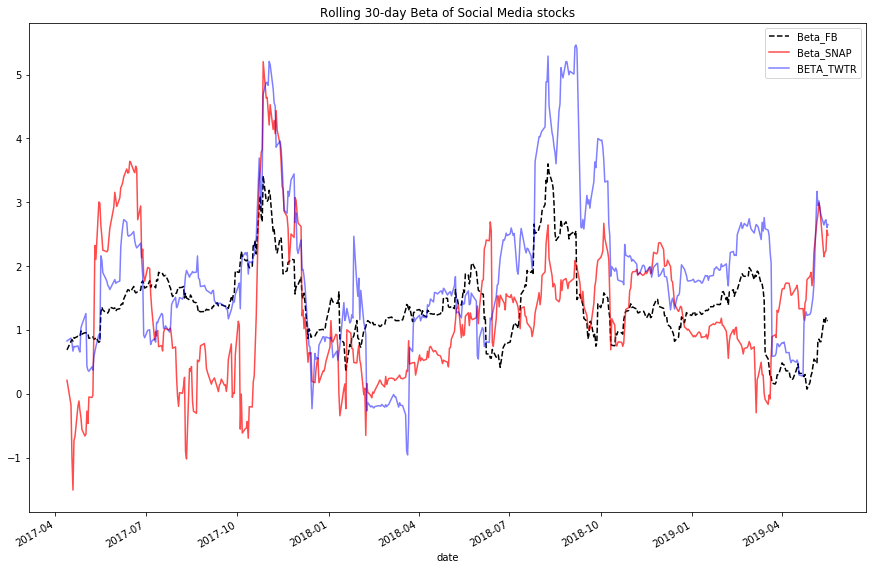

In [47]:
# Set the figure and plot the different datasets as multiple trends on the same figure
plot1 = Roll_beta_FB.plot(figsize=(15, 10), linestyle='dashed', color='k', title='Rolling 30-day Beta of Social Media stocks')
Roll_beta_SNAP.plot(ax=plot1, color='r', alpha=0.7)
Roll_beta_TWTR.plot(ax=plot1, color='b', alpha=0.5)

# Set the legend of the figure
plot1.legend(['Beta_FB', 'Beta_SNAP', 'BETA_TWTR'])